# ***Ejemplo para Gráficos del Descenso del Gradiente***

Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Clase:** 4

A continuación se presenta de manera breve, una gráfico TRIDIMENSIONAL que presenta la suma de dos funciones guassianas descritas por la ecuación mostrada abajo, con el objetivo de mostrar una coordenada (X1,X2) aleatoria y posteriormente calcular su gradiente para poder visualizarlo.

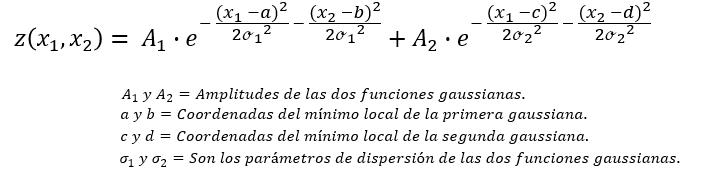

Se desarolla la función z para poder ser ploetada:

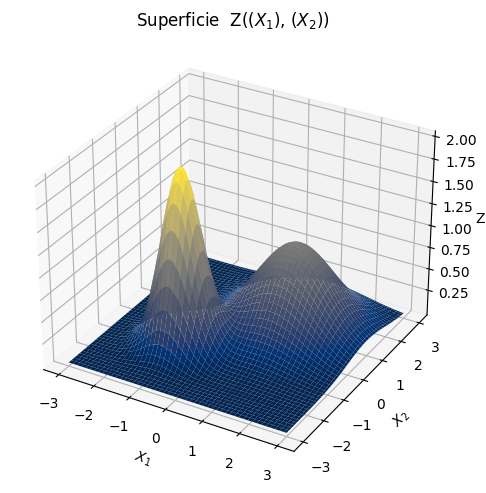

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función z
def z_function(x1, x2):
    A1 = 1
    A2 = 2
    x1_1, x2_1 = 1, 1  # Coordenadas del mínimo local de la primera función gaussiana
    x1_2, x2_2 = -1, -1  # Coordenadas del mínimo local de la segunda función gaussiana
    sigma1 = 1
    sigma2 = 0.5

    z = (A1 * np.exp(-(x1 - x1_1)**2 / (2 * sigma1**2) - (x2 - x2_1)**2 / (2 * sigma1**2)) +
         A2 * np.exp(-(x1 - x1_2)**2 / (2 * sigma2**2) - (x2 - x2_2)**2 / (2 * sigma2**2)))

    return z

# Crear datos para la gráfica
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x1, x2)
z = z_function(x1, x2)

# Graficar z en función de x1 y x2
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='cividis')

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('Z', labelpad=1)  # Ajustar la posición vertical de la etiqueta Z
ax.set_title('Superficie  Z(($X_1$), ($X_2$))')

plt.tight_layout()  # Ajustar el tamaño del área de trazado para evitar el marco blanco grande
#plt.savefig('Superficie_Z.png', dpi=300)
plt.show()


Se agrega una coordenada "aleatoria" con el objetivo de simular un individuo posicionado algun punto alto de la montaña.

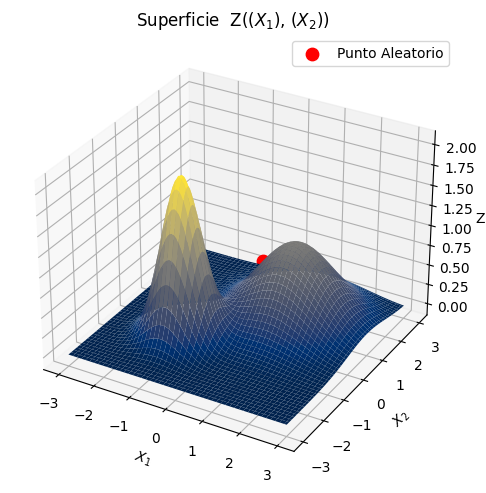

In [2]:
# Coordenadas del punto aleatorio
X1_Ale = 0.19525
X2_Ale = 0.86075
Z_Ale = z_function(X1_Ale, X2_Ale)

# Graficar z en función de x1 y x2
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='cividis')

# Graficar el punto aleatorio
ax.scatter(X1_Ale, X2_Ale, Z_Ale, color='red', s=80, label='Punto Aleatorio')

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('Z', labelpad=1)  # Ajustar la posición vertical de la etiqueta Z
ax.set_title('Superficie  Z(($X_1$), ($X_2$))')

# Agregar leyenda
ax.legend()

plt.tight_layout()  # Ajustar el tamaño del área de trazado para evitar el marco blanco grande
#plt.savefig('Superficie_Z_Punto_Aleatorio_Leyenda.png', dpi=300)
plt.show()


Si observamos las lineas de contorno de nuestra función y colocamos la muestra, podemos observar evidentemente que, el "Punto Aleatorio" se encuentra en un punto intermedio de la función (no es el punto más alto, tampoco el más bajo).

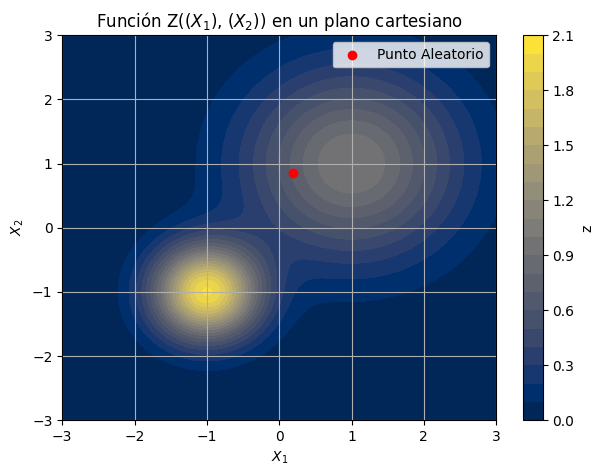

In [4]:
# Coordenadas del punto
X1_Ale = 0.19525
X2_Ale = 0.86075

# Graficar z en función de x1 y x2
plt.figure(figsize=(7, 5))
plt.contourf(x1, x2, z, levels=20, cmap='cividis')  # Cambia 'viridis' por el color map que prefieras
plt.colorbar(label='z')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Función Z(($X_1$), ($X_2$)) en un plano cartesiano')

# Agregar el punto negro
plt.scatter(X1_Ale, X2_Ale, color='red', label='Punto Aleatorio')

# Mostrar leyenda
plt.legend()

plt.grid(True)
#plt.savefig('CurvasDeNivelZ_puntoAleatorio.png', dpi=300)
plt.show()

Realizando una aproximación muy rápida del gradiente (mediante una técnica de aproximación para las derivadas parciales de X1 y X2), se puede observar que para ese punto aleatorio en particular, el gradiente (aporte de la derivada parcial X1 y aporte de la derivada parcia X2) generan un vector (Gradiente) que muestra la pendiente relativa a ese punto apuntando hacia el crecimiento de la función en esa zona (máximo local) en este caso de una de las gaussianas.

Lo anterior entonces, concluye que:

La conformación del vector nos indica la dirección hacia la que la pendiente asciende (GRADIENTE).


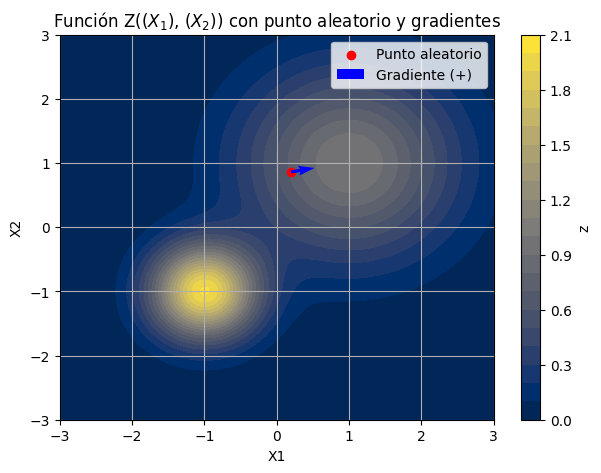

In [6]:
random_point = (X1_Ale, X2_Ale)

random_point_z = z_function(random_point[0], random_point[1])  # Calcular el valor de z en el punto aleatorio

# Calcular el gradiente en el punto aleatorio
h = 0.01
gradient_x1 = (z_function(random_point[0] + h, random_point[1]) - z_function(random_point[0] - h, random_point[1])) / (2 * h)
gradient_x2 = (z_function(random_point[0], random_point[1] + h) - z_function(random_point[0], random_point[1] - h)) / (2 * h)

# Crear datos para la gráfica
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x1, x2)
z = z_function(x1, x2)

# Graficar z en función de x1 y x2
plt.figure(figsize=(7, 5))
plt.contourf(x1, x2, z, levels=20, cmap='cividis')  # Cambia 'cividis' por el color map que prefieras
plt.colorbar(label='z')
plt.scatter(random_point[0], random_point[1], color='red', label='Punto aleatorio')  # Agregar punto aleatorio
plt.quiver(random_point[0], random_point[1], gradient_x1, gradient_x2, color='blue', label='Gradiente (+)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Función Z(($X_1$), ($X_2$)) con punto aleatorio y gradientes')
plt.legend()
plt.grid(True)
#plt.savefig('CurvasDeNivelZ_Gradiente(+).png', dpi=300)
plt.show()

Por tanto, si lo que queremos es descender, para encontrar por ejemplo en aprendizaje automático la reducción en una función de coste, podemos usar el concepto de ir en sentido contratio al GRADIENTE es decir hacia el -GRADIENTE.

A continuación se presente dicho vector apuntando en el sentido contrario al GRADIENTE.

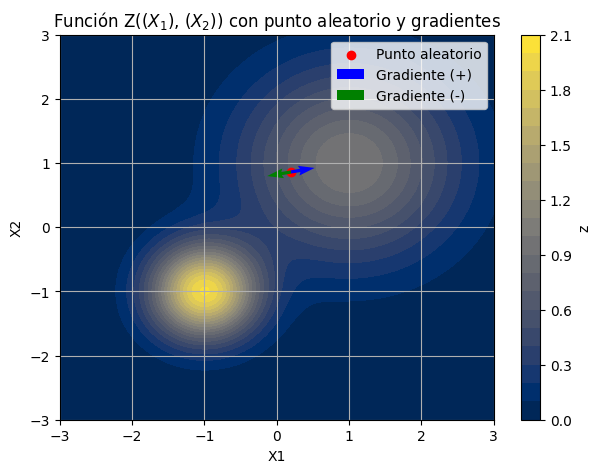

In [7]:
random_point = (X1_Ale, X2_Ale)

random_point_z = z_function(random_point[0], random_point[1])  # Calcular el valor de z en el punto aleatorio

# Calcular el gradiente en el punto aleatorio
h = 0.01
gradient_x1 = (z_function(random_point[0] + h, random_point[1]) - z_function(random_point[0] - h, random_point[1])) / (2 * h)
gradient_x2 = (z_function(random_point[0], random_point[1] + h) - z_function(random_point[0], random_point[1] - h)) / (2 * h)

# Crear datos para la gráfica
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x1, x2)
z = z_function(x1, x2)

# Graficar z en función de x1 y x2
plt.figure(figsize=(7, 5))
plt.contourf(x1, x2, z, levels=20, cmap='cividis')  # Cambia 'cividis' por el color map que prefieras
plt.colorbar(label='z')
plt.scatter(random_point[0], random_point[1], color='red', label='Punto aleatorio')  # Agregar punto aleatorio
plt.quiver(random_point[0], random_point[1], gradient_x1, gradient_x2, color='blue', label='Gradiente (+)')
plt.quiver(random_point[0], random_point[1], -gradient_x1, -gradient_x2, color='green', label='Gradiente (-)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Función Z(($X_1$), ($X_2$)) con punto aleatorio y gradientes')
plt.legend()
plt.grid(True)
#plt.savefig('CurvasDeNivelZ_Gradiente(+) y (-).png', dpi=300)
plt.show()


Para mayor facilidad, se ha dispuesto un gráfico TRI-DIMENSIONAL e interactivo para que explore con facilidad la dirección del GRADIENTE y el (-) GRADIENTE en el ejercicio explicativo dispuesto.

In [9]:
import plotly.graph_objs as go

X1_Ale = 0.19525
X2_Ale = 0.86075

random_point = (X1_Ale,X2_Ale)

random_point_z = z_function(random_point[0], random_point[1])  # Calcular el valor de z en el punto aleatorio

# Calcular el gradiente en el punto aleatorio
h = 0.01
gradient_x1 = (z_function(random_point[0] + h, random_point[1]) - z_function(random_point[0] - h, random_point[1])) / (2 * h)
gradient_x2 = (z_function(random_point[0], random_point[1] + h) - z_function(random_point[0], random_point[1] - h)) / (2 * h)

# Crear datos para la gráfica
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x1, x2)
z = z_function(x1, x2)

# Crear flechas para el gradiente y su negativo
arrows_gradient = go.Scatter3d(x=[random_point[0]], y=[random_point[1]], z=[random_point_z],
                               mode='lines',
                               line=dict(color='blue', width=3),
                               hoverinfo='skip',
                               showlegend=True,
                               name='(+) Gradiente')
arrows_negative_gradient = go.Scatter3d(x=[random_point[0]], y=[random_point[1]], z=[random_point_z],
                                        mode='lines',
                                        line=dict(color='green', width=3),
                                        hoverinfo='skip',
                                        showlegend=True,
                                        name='(-) Gradiente')

# Ajustar longitudes de las flechas según magnitud del gradiente
scale_factor = 1.7  # factor de escala para ajustar longitud de las flechas
arrows_gradient['x'] = [random_point[0], random_point[0] + scale_factor * gradient_x1]
arrows_gradient['y'] = [random_point[1], random_point[1] + scale_factor * gradient_x2]
arrows_gradient['z'] = [random_point_z, random_point_z + scale_factor * (gradient_x1 + gradient_x2)]

arrows_negative_gradient['x'] = [random_point[0], random_point[0] - scale_factor * gradient_x1]
arrows_negative_gradient['y'] = [random_point[1], random_point[1] - scale_factor * gradient_x2]
arrows_negative_gradient['z'] = [random_point_z, random_point_z - scale_factor * (gradient_x1 + gradient_x2)]

# Crear figura 3D interactiva con punto aleatorio y gradiente
fig = go.Figure(data=[go.Surface(z=z, x=x1, y=x2, colorscale='Cividis'),
                      go.Scatter3d(x=[random_point[0]], y=[random_point[1]], z=[random_point_z], mode='markers', marker=dict(size=7, color='red'), name='Punto aleatorio'),
                      arrows_gradient,
                      arrows_negative_gradient])
fig.update_layout(title='Superficie 3D de z(x1, x2) con punto aleatorio y gradientes',
                  scene=dict(
                      xaxis_title='X1',
                      yaxis_title='X2',
                      zaxis_title='Z'),
                  legend=dict(x=0, y=0, bgcolor='rgba(255, 255, 255, 0.5)'))  # Posición de la leyenda
fig.show()